# Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency


# Lecture de données

In [34]:
#lecture du fichier

base =  pd.read_csv("C:/Users/Cyrie/OneDrive/Bureau/M2_DS/S1/MLOPS/Rendu_MLOPS/athlete_events.csv")  
# base = pd.read_csv("/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/athlete_events.csv")
#base = pd.read_csv("//ad.univ-lille.fr/Etudiants/Homedir3/147794/Documents/M2/Rendu_MLOPS/athlete_events.csv")


# Filtre sur Summer

In [35]:
#filtre sur Summer
base_summer = base[base['Season'] == 'Summer']

#nombre de ligne de notre df base après filtre du df base summer
nombre_de_lignes1 = base_summer.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes1)

Nombre de lignes : 222552


# Valeurs manquantes et abbérantes du df base_summer

In [ ]:
#valeurs manquantes pour le df base summer
valeurs_manquantes_par_variable1 = base_summer.isnull().sum()

# Affichage du résultat pour le df base summer
print(valeurs_manquantes_par_variable1)

In [ ]:
#valeur abbérentes
# Création de la figure et des axes
plt.figure(figsize=(8, 6))

###################AGE#####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Age'], color='#008030')

# Titres et labels
plt.title('Boîte à moustaches de la variable age selon la médaille')
plt.xlabel('Médaille')
plt.show()

###################Height####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Height'], color='#008080')

# Titres et labels
plt.title('Boîte à moustaches de la variable taille selon la médaille')
plt.xlabel('Médaille')
plt.show()


###################Weight####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Weight'], color='#008030')

# Titres et labels
plt.title('Boîte à moustaches de la variable poids selon la médaille')
plt.xlabel('Médaille')
plt.show()




In [ ]:
#lecture des valeurs abbérantes
# Filtre sur les enregistrements où l'âge est supérieur à 40 et inférieur à 11 ans
base_summer_age_11_40 = base_summer[(base_summer['Age'] > 40) | (base_summer['Age'] < 11)]
print("DataFrame pour l'âge entre 11 et 40 ans inclus:")
print(base_summer_age_11_40)

# Filtre sur les enregistrements où la taille est inférieure à 145 cm et supérieure à 210 cm
base_summer_height_145_210 = base_summer[(base_summer['Height'] > 210) | (base_summer['Height'] < 145)]
print("\nDataFrame pour la taille entre 145 et 210 cm inclus:")
print(base_summer_height_145_210)

# Filtre sur les enregistrements où le poids est inférieur à 35 kg et supérieur à 118 kg
base_summer_weight_35_118 = base_summer[(base_summer['Weight'] > 118) | (base_summer['Weight'] < 35)]
print("\nDataFrame pour le poids entre 35 et 118 kg inclus:")
print(base_summer_weight_35_118)


# Regroupements

In [ ]:
#voir la répartiton des variables quantitatives avant le regroupement
###################YEAR####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Year'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Year'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable année ')
plt.xlabel('Année')
plt.ylabel('Densité')
plt.show()

###################AGE#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Age'], bins=30, kde=True, color='#008080', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Age'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable age ')
plt.xlabel('Age')
plt.ylabel('Densité')
plt.show()

###################HEIGHT#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Height'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Height'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable taille ')
plt.xlabel('Taille')
plt.ylabel('Densité')
plt.show()

###################WEIGHT#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Weight'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Weight'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable poids ')
plt.xlabel('Poids')
plt.ylabel('Densité')
plt.show()

In [36]:
#faire les regrouepements sur les variables quantitatives
###################AGE#####################
#intervalles d'age
intervalles = [0, 21, 25, 33, float('inf')]
labels = ['< 21 ans', '21 - 24 ans', '25-32 ans', '> 32 ans']
#nouvelle colonne "Classe_age" basée sur les intervalles définis
base_summer['Classe_age'] = pd.cut(base_summer['Age'], bins=intervalles, labels=labels, right=False)
#convertir la colonne "Classe_age" en catégorie si nécessaire
base_summer['Classe_age'] = base_summer['Classe_age'].astype('category')
#afficher les premières lignes du DataFrame avec la nouvelle colonne
print(base_summer[['Age', 'Classe_age']].head(5))

###################HEIGHT#####################
intervalles_taille = [float('-inf'), 165, 173, 186, float('inf')]
labels_taille = ['< 165 cm', '165 - 172 cm', '173 - 185 cm', '> 185 cm']
base_summer['Classe_height'] = pd.cut(base_summer['Height'], bins=intervalles_taille, labels=labels_taille, right=False)
base_summer['Classe_height'] = base_summer['Classe_height'].astype('category')
print(base_summer[['Height', 'Classe_height']].head(5))

###################WEIGHT#####################
intervalles_poids = [float('-inf'), 65, 74, 81, float('inf')]
labels_poids = ['< 65 kg', '65 - 73 kg', '74 - 80 kg', '> 80 kg']
base_summer['Classe_weight'] = pd.cut(base_summer['Weight'], bins=intervalles_poids, labels=labels_poids, right=False)
base_summer['Classe_weight'] = base_summer['Classe_weight'].astype('category')
print(base_summer[['Weight', 'Classe_weight']].head(70))


     Age   Classe_age
0   24.0  21 - 24 ans
1   23.0  21 - 24 ans
2   24.0  21 - 24 ans
3   34.0     > 32 ans
26  18.0     < 21 ans
    Height Classe_height
0    180.0  173 - 185 cm
1    170.0  165 - 172 cm
2      NaN           NaN
3      NaN           NaN
26   168.0  165 - 172 cm
     Weight Classe_weight
0      80.0    74 - 80 kg
1      60.0       < 65 kg
2       NaN           NaN
3       NaN           NaN
26      NaN           NaN
..      ...           ...
127    93.0       > 80 kg
128    93.0       > 80 kg
129    93.0       > 80 kg
130    74.0    74 - 80 kg
131    74.0    74 - 80 kg

[70 rows x 2 columns]


C:\Users\Cyrie\AppData\Local\Temp\ipykernel_25312\1319861514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_summer['Classe_age'] = pd.cut(base_summer['Age'], bins=intervalles, labels=labels, right=False)
C:\Users\Cyrie\AppData\Local\Temp\ipykernel_25312\1319861514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_summer['Classe_age'] = base_summer['Classe_age'].astype('category')
C:\Users\Cyrie\AppData\Local\Temp\ipykernel_25312\1319861514.py:16: SettingWithCopyWarning: 
A value is trying t

In [6]:
#afficher les frequences de modalites pour les variables regroupes
###################AGE#####################
print("Fréquences de modalités pour la Classe âge:")
print(base_summer['Classe_age'].value_counts())

###################HEIGHT#####################
print("\nFréquences de modalités pour la Classe taille:")
print(base_summer['Classe_height'].value_counts())

###################WEIGHT#####################
print("\nFréquences de modalités pour la Classe poids:")
print(base_summer['Classe_weight'].value_counts())


#fonction pour afficher les fréquences en pourcentage
def print_percentage_counts(column_name):
    percentages = base_summer[column_name].value_counts(normalize=True) * 100
    print(f"Fréquences en pourcentage pour la colonne '{column_name}':")
    print(percentages)

# Afficher les fréquences en pourcentage pour la classe d'âge
print_percentage_counts('Classe_age')

# Afficher les fréquences en pourcentage pour la classe de taille
print("\n")
print_percentage_counts('Classe_height')

# Afficher les fréquences en pourcentage pour la classe de poids
print("\n")
print_percentage_counts('Classe_weight')


Fréquences de modalités pour la Classe âge:
Classe_age
25-32 ans      81445
21 - 24 ans    67092
< 21 ans       39813
> 32 ans       25013
Name: count, dtype: int64

Fréquences de modalités pour la Classe taille:
Classe_height
173 - 185 cm    72493
165 - 172 cm    42630
> 185 cm        30070
< 165 cm        25502
Name: count, dtype: int64

Fréquences de modalités pour la Classe poids:
Classe_weight
< 65 kg       60713
65 - 73 kg    43196
> 80 kg       36610
74 - 80 kg    28179
Name: count, dtype: int64
Fréquences en pourcentage pour la colonne 'Classe_age':
Classe_age
25-32 ans      38.172035
21 - 24 ans    31.445002
< 21 ans       18.659749
> 32 ans       11.723213
Name: proportion, dtype: float64


Fréquences en pourcentage pour la colonne 'Classe_height':
Classe_height
173 - 185 cm    42.469317
165 - 172 cm    24.974369
> 185 cm        17.616216
< 165 cm        14.940098
Name: proportion, dtype: float64


Fréquences en pourcentage pour la colonne 'Classe_weight':
Classe_weight
< 65 

# Filtre les années 2000 et suppression de variable

In [37]:
#filtre sur l annee sup ou egal a 2000
base_summer_2000 = base_summer[base_summer['Year'] >= 2000]

#nombre de ligne de notre df base après filtre du df base summer 2000
nombre_de_lignes2 = base_summer_2000.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes2)

Nombre de lignes : 67474


In [38]:
# Supprimer les variables 'Team' et 'Season' du DataFrame base_summer_2000
base_summer_2000 = base_summer_2000.drop(['Team', 'Season','Age','Height','Weight'], axis=1)


# Afficher les premières lignes du DataFrame après la suppression
print(base_summer_2000.head())

    ID                       Name Sex  NOC        Games  Year     City  \
1    2                   A Lamusi   M  CHN  2012 Summer  2012   London   
31  12          Jyri Tapani Aalto   M  FIN  2000 Summer  2000   Sydney   
33  13         Minna Maarit Aalto   F  FIN  2000 Summer  2000   Sydney   
57  18       Timo Antero Aaltonen   M  FIN  2000 Summer  2000   Sydney   
79  21  Ragnhild Margrethe Aamodt   F  NOR  2008 Summer  2008  Beijing   

        Sport                         Event Medal   Classe_age Classe_height  \
1        Judo  Judo Men's Extra-Lightweight   NaN  21 - 24 ans  165 - 172 cm   
31  Badminton       Badminton Men's Singles   NaN    25-32 ans  165 - 172 cm   
33    Sailing    Sailing Women's Windsurfer   NaN     > 32 ans      < 165 cm   
57  Athletics      Athletics Men's Shot Put   NaN    25-32 ans      > 185 cm   
79   Handball     Handball Women's Handball  Gold    25-32 ans      < 165 cm   

   Classe_weight  
1        < 65 kg  
31    65 - 73 kg  
33       < 65 kg 

# Valeurs manquantes du df base_summer_2000

In [9]:
#valeurs manquantes pour le df base summer 2000
valeurs_manquantes_par_variable2 = base_summer_2000.isnull().sum()

# Affichage du résultat pour le df base 
print(valeurs_manquantes_par_variable2)


ID                   0
Name                 0
Sex                  0
NOC                  0
Games                0
Year                 0
City                 0
Sport                0
Event                0
Medal            57457
Classe_age           3
Classe_height      654
Classe_weight      905
dtype: int64


In [39]:
# suppression des valeurs manquantes 
base_summer_2000_net = base_summer_2000.dropna(subset=['Classe_age','Classe_height','Classe_weight'])
base_summer_2000_net.isnull().sum()

ID                   0
Name                 0
Sex                  0
NOC                  0
Games                0
Year                 0
City                 0
Sport                0
Event                0
Medal            56493
Classe_age           0
Classe_height        0
Classe_weight        0
dtype: int64

In [ ]:
#nombre de ligne de notre df base après filtre du df base summer
nombre_de_lignes3 = base_summer_2000_net.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes3)

# Statistiques descriptives

## statistique univarié

In [ ]:
colors = ['#008030', '#008080', '#00A86B', '#4CAF50', '#7CFC00']

# Statistique sur la variable sex 

plt.figure(figsize=(6,6))
base_summer_2000_net['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,startangle=15, colors = colors)
plt.title('Répartition des sexes')
plt.show()

In [ ]:
# Statistique sur la variable classe_age

plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_age'].value_counts().plot.pie(colors = colors,autopct='%1.1f%%')
plt.title('Répartition des âges')
plt.show()

In [ ]:
# Statistique sur la variable classe_height

plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_height'].value_counts().plot.pie(colors = colors, autopct='%1.1f%%')
plt.title('Répartition des tailles')
plt.show()

In [ ]:
# Statistique sur la variable height

plt.figure(figsize=(12, 6))

# Comptez les occurrences de chaque catégorie
total = float(len(base_summer_2000_net["Classe_height"]))

# Utilisez sns.countplot pour afficher le graphique à barres
ax = sns.countplot(x="Classe_height", data=base_summer_2000_net, palette='viridis')

# Modifiez l'axe y pour être en pourcentage
def percent_formatter(x, pos):
    return f'{(x / total):.0%}'

ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Ajoutez les pourcentages au centre des barres
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2,
            '{:.0%}'.format(height / total), ha="center")

plt.title('Répartition des tailles')
plt.xlabel("Classe_height")
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Statistique sur la variable weight

plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_weight'].value_counts().plot.pie(colors = colors, autopct='%1.1f%%')
plt.title('Répartition des poids')
plt.show()

In [ ]:
# Statistique sur la variable weight

plt.figure(figsize=(12, 6))

# Comptez les occurrences de chaque catégorie
total = float(len(base_summer_2000_net["Classe_weight"]))

# Utilisez sns.countplot pour afficher le graphique à barres
ax = sns.countplot(x="Classe_weight", data=base_summer_2000_net, palette='viridis')

# Modifiez l'axe y pour être en pourcentage
def percent_formatter(x, pos):
    return f'{(x / total):.0%}'

ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Ajoutez les pourcentages au centre des barres
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2,
            '{:.0%}'.format(height / total), ha="center")

plt.title('Répartition des poids')
plt.xlabel("Classe_xeight")
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Statistique sur la variable NOC 

# Créer un DataFrame pour le nombre d'individus par pays
tableau_noc = base_summer_2000_net.groupby('NOC').size().reset_index(name='Nombre d\'individus')

# Trier le tableau par le nombre d'individus de manière décroissante
tableau_noc_trie = tableau_noc.sort_values(by='Nombre d\'individus', ascending=False)

# Sélectionner les 16 premiers
les_16_premiers = tableau_noc_trie.head(16)

# Afficher les 16 premiers pays les plus représentés
les_16_premiers


## statistique bivarié

In [ ]:
def create_bar_plot(base_summer_2000_net, x_variable, target_variable='Medal'):

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.countplot(x=x_variable, hue=target_variable, data=base_summer_2000_net, palette='viridis')
    plt.title(f'Répartition des {target_variable} selon leurs {x_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=target_variable)
    plt.show()

# Example usage:
# Assuming your DataFrame is named df
create_bar_plot(base_summer_2000_net, 'Sex')
create_bar_plot(base_summer_2000_net, 'Classe_age')
create_bar_plot(base_summer_2000_net, 'Classe_height')
create_bar_plot(base_summer_2000_net, 'Classe_weight')
create_bar_plot(base_summer_2000_net, 'NOC')
create_bar_plot(base_summer_2000_net, 'Games')
create_bar_plot(base_summer_2000_net, 'Sport')



# Corrélation entre les variables - V de Cramer

In [22]:
# Sélectionnez vos variables catégorielles
categorical_vars = ['Name', 'Sex', 'NOC', 'Games', 'City', 'Sport',
                    'Event', 'Medal', 'Classe_age', 'Classe_height', 'Classe_weight']

In [23]:
# Créez une table de contingence pour chaque paire de variables
contingency_tables = {}
for var1 in categorical_vars:
    for var2 in categorical_vars:
        contingency_table = pd.crosstab(base_summer_2000_net[var1], base_summer_2000_net[var2])
        contingency_tables[(var1, var2)] = contingency_table

In [24]:
# Calculez le V de Cramer pour chaque paire de variables
cramer_v_values = {}
for (var1, var2), contingency_table in contingency_tables.items():
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    cramer_v_values[(var1, var2)] = cramers_v

In [25]:

# Créez un DataFrame pour stocker les valeurs du V de Cramer
cramer_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramer_df.loc[var1, var2] = cramer_v_values.get((var1, var2), cramer_v_values.get((var2, var1)))

# Convertissez les valeurs en nombres décimaux
cramer_df = cramer_df.astype(float)

In [ ]:
# Créer une masque pour la moitié supérieure de la matrice, en excluant la diagonale inférieure
mask = np.triu(np.ones_like(cramer_df, dtype=bool), k=1)

plt.figure(figsize=(12, 8))
sns.heatmap(cramer_df, annot=True, cmap='BuGn', fmt=".2f", mask=mask)
plt.title("Matrice de corrélation - V de Cramer")
plt.show()

# Faire de nouveaux regroupement et suppression des variables inutisé pour la suite de l'analyse

In [40]:
base_ACM = base_summer_2000_net


In [41]:
base_ACM['Sport'].replace({

'Judo'	: 'Combat' ,
'Wrestling'	: 'Combat' ,
'Taekwondo'	: 'Combat' ,
'Fencing'	: 'Combat' ,
'Boxing'	: 'Combat' ,
'Badminton'	:'Raquette',
'Tennis'	:'Raquette',
'Table Tennis'	:'Raquette',
'Swimming'	: 'Natation',
'Synchronized Swimming'	: 'Natation',
'Basketball'	: 'Sport collectif',
'Handball'	: 'Sport collectif',
'Football'	: 'Sport collectif',
'Hockey'	: 'Sport collectif',
'Water Polo'	: 'Sport collectif',
'Softball'	: 'Sport collectif',
'Volleyball'	: 'Sport collectif',
'Baseball'	: 'Sport collectif',
'Rugby Sevens'	: 'Sport collectif',
'Beach Volleyball'	: 'Sport collectif',
'Athletics'	:'Athlétisme',
'Modern Pentathlon'	:'Athlétisme',
'Triathlon'	:'Athlétisme',
'Gymnastics'	:'Gymnastique',
'Rhythmic Gymnastics'	:'Gymnastique',
'Trampolining'	:'Gymnastique',
'Sailing'	:"Sur l'eau",
'Rowing'	:"Sur l'eau",
'Diving'	:"Sur l'eau",
'Canoeing'	:"Sur l'eau",
'Weightlifting'	:'Autres sports',
'Cycling'	:'Autres sports',
'Equestrianism'	:'Autres sports',
'Archery'	:'Autres sports',
'Shooting'	:'Autres sports',
'Golf'	:'Autres sports'
}, inplace=True)

base_ACM['Sport'].unique()

C:\Users\Cyrie\AppData\Local\Temp\ipykernel_25312\2961306059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_ACM['Sport'].replace({


array(['Combat', 'Raquette', "Sur l'eau", 'Athlétisme', 'Autres sports',
       'Natation', 'Gymnastique', 'Sport collectif'], dtype=object)

In [42]:
base_ACM['NOC'].unique()

array(['CHN', 'FIN', 'ROU', 'NOR', 'NED', 'FRA', 'EST', 'ESP', 'EGY',
       'ITA', 'AZE', 'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'MEX',
       'USA', 'NCA', 'ALG', 'BRN', 'IRQ', 'QAT', 'PAK', 'IRI', 'CAN',
       'IRL', 'AUS', 'RSA', 'MAR', 'ERI', 'SUD', 'BEL', 'KAZ', 'BRU',
       'KUW', 'MAS', 'INA', 'UZB', 'UAE', 'KGZ', 'TJK', 'JPN', 'GER',
       'ETH', 'TUR', 'SRI', 'ARM', 'CIV', 'KEN', 'NGR', 'BRA', 'SYR',
       'CHI', 'SUI', 'SWE', 'GUY', 'GEO', 'POR', 'ANG', 'COL', 'DJI',
       'BAN', 'JOR', 'PLE', 'SOM', 'KSA', 'VEN', 'IND', 'GBR', 'GHA',
       'UGA', 'TUN', 'SLO', 'HON', 'TKM', 'MRI', 'POL', 'NIG', 'SKN',
       'NZL', 'LBR', 'SUR', 'NEP', 'LBA', 'MGL', 'PLW', 'LTU', 'NAM',
       'UKR', 'ASA', 'PUR', 'SAM', 'RWA', 'CRO', 'DMA', 'DEN', 'MLT',
       'AUT', 'SEY', 'DOM', 'BIZ', 'PAR', 'URU', 'COM', 'MDV', 'BEN',
       'TTO', 'SGP', 'PER', 'BER', 'SCG', 'HUN', 'CYP', 'YEM', 'LIB',
       'OMA', 'IOA', 'FIJ', 'VAN', 'JAM', 'MDA', 'GUA', 'BUL', 'LAT',
       'SRB', 'IVB',

In [43]:
base_ACM['NOC'].replace({
'CHN': 'Asie',
'FIN': 'Europe',
'ROU': 'Europe',
'NOR': 'Europe',
'NED': 'Europe',
'FRA': 'Europe',
'EST': 'Europe',
'ESP': 'Europe',
'EGY': 'Afrique',
'ITA': 'Europe',
'AZE': 'Asie',
'RUS': 'Europe',
'ARG': 'Amérique du Sud',
'CUB': 'Amérique du Nord',
'BLR': 'Europe',
'GRE': 'Europe',
'CMR': 'Afrique',
'MEX': 'Amérique du Nord',
'USA': 'Amérique du Nord',
'NCA': 'Amérique centrale',
'ALG': 'Afrique',
'BRN': 'Asie',
'IRQ': 'Asie',
'QAT': 'Asie',
'PAK': 'Asie',
'IRI': 'Asie',
'CAN': 'Amérique du Nord',
'IRL': 'Europe',
'AUS': 'Océanie',
'RSA': 'Afrique',
'MAR': 'Afrique',
'ERI': 'Afrique',
'SUD': 'Afrique',
'BEL': 'Europe',
'KAZ': 'Asie',
'BRU': 'Asie',
'KUW': 'Asie',
'MAS': 'Asie',
'INA': 'Asie',
'UZB': 'Asie',
'UAE': 'Asie',
'KGZ': 'Asie',
'TJK': 'Asie',
'JPN': 'Asie',
'GER': 'Europe',
'ETH': 'Afrique',
'TUR': 'Asie',
'SRI': 'Asie',
'ARM': 'Asie',
'CIV': 'Afrique',
'KEN': 'Afrique',
'NGR': 'Afrique',
'BRA': 'Amérique du Sud',
'SYR': 'Asie',
'CHI': 'Amérique du Sud',
'SUI': 'Europe',
'SWE': 'Europe',
'GUY': 'Amérique du Sud',
'GEO': 'Asie',
'POR': 'Europe',
'ANG': 'Afrique',
'COL': 'Amérique du Sud',
'DJI': 'Afrique',
'BAN': 'Asie',
'JOR': 'Asie',
'PLE': 'Asie',
'SOM': 'Afrique',
'KSA': 'Asie',
'VEN': 'Amérique du Sud',
'IND': 'Asie',
'GBR': 'Europe',
'GHA': 'Afrique',
'UGA': 'Afrique',
'TUN': 'Afrique',
'SLO': 'Europe',
'HON': 'Amérique centrale',
'TKM': 'Asie',
'MRI': 'Afrique',
'POL': 'Europe',
'NIG': 'Afrique',
'SKN': 'Amérique du Nord',
'NZL': 'Océanie',
'LBR': 'Afrique',
'SUR': 'Amérique du Sud',
'NEP': 'Asie',
'LBA': 'Afrique',
'MGL': 'Asie',
'PLW': 'Océanie',
'LTU': 'Europe',
'NAM': 'Afrique',
'UKR': 'Europe',
'ASA': 'Océanie',
'PUR': 'Amérique du Nord',
'SAM': 'Océanie',
'RWA': 'Afrique',
'CRO': 'Europe',
'DMA': 'Amérique du Nord',
'DEN': 'Europe',
'MLT': 'Europe',
'AUT': 'Europe',
'SEY': 'Afrique',
'DOM': 'Amérique du Nord',
'BIZ': 'Amérique centrale',
'PAR': 'Amérique du Sud',
'URU': 'Amérique du Sud',
'COM': 'Afrique',
'MDV': 'Asie',
'BEN': 'Afrique',
'TTO': 'Amérique du Nord',
'SGP': 'Asie',
'PER': 'Amérique du Sud',
'BER': 'Amérique du Nord',
'SCG': 'Europe',
'HUN': 'Europe',
'CYP': 'Europe',
'YEM': 'Asie',
'LIB': 'Afrique',
'OMA': 'Asie',
'IOA': 'Océanie',
'FIJ': 'Océanie',
'VAN': 'Océanie',
'JAM': 'Amérique du Nord',
'MDA': 'Europe',
'GUA': 'Amérique centrale',
'BUL': 'Europe',
'LAT': 'Europe',
'SRB': 'Europe',
'IVB': 'Amérique du Nord',
'VIN': 'Amérique centrale',
'ISL': 'Europe',
'CRC': 'Amérique centrale',
'ESA': 'Amérique centrale',
'CAF': 'Afrique',
'MAD': 'Afrique',
'CHA': 'Afrique',
'BIH': 'Europe',
'GUM': 'Océanie',
'PHI': 'Asie',
'CAY': 'Amérique du Nord',
'SVK': 'Europe',
'BAR': 'Amérique du Nord',
'ECU': 'Amérique du Sud',
'PAN': 'Amérique centrale',
'TLS': 'Asie',
'GAB': 'Afrique',
'BAH': 'Amérique du Nord',
'SMR': 'Europe',
'ISR': 'Asie',
'THA': 'Asie',
'BOT': 'Afrique',
'ROT': 'Océanie',
'KOR': 'Asie',
'PRK': 'Asie',
'MOZ': 'Afrique',
'CPV': 'Afrique',
'CZE': 'Europe',
'LAO': 'Asie',
'LUX': 'Europe',
'AND': 'Europe',
'ZIM': 'Afrique',
'GRN': 'Amérique du Nord',
'HKG': 'Asie',
'LCA': 'Amérique du Nord',
'HAI': 'Amérique du Nord',
'FSM': 'Océanie',
'MYA': 'Asie',
'AFG': 'Asie',
'SEN': 'Afrique',
'MTN': 'Afrique',
'COD': 'Afrique',
'GUI': 'Afrique',
'ANT': 'Amérique du Nord',
'CGO': 'Afrique',
'MKD': 'Europe',
'BOL': 'Amérique du Sud',
'TOG': 'Afrique',
'SLE': 'Afrique',
'MON': 'Europe',
'GEQ': 'Afrique',
'MNE': 'Europe',
'ISV': 'Amérique du Nord',
'PNG': 'Océanie',
'TAN': 'Afrique',
'COK': 'Océanie',
'ALB': 'Europe',
'MLI': 'Afrique',
'SWZ': 'Afrique',
'BDI': 'Afrique',
'ARU': 'Amérique du Sud',
'STP': 'Afrique',
'NRU': 'Océanie',
'GBS': 'Afrique',
'ZAM': 'Afrique',
'TPE': 'Asie',
'CAM': 'Amérique centrale',
'MAW': 'Afrique',
'BHU': 'Asie',
'VIE': 'Asie',
'GAM': 'Afrique',
'MHL': 'Océanie',
'AHO': 'Océanie',
'KIR': 'Océanie',
'TUV': 'Océanie',
'TGA': 'Océanie',
'LIE': 'Europe',
'KOS': 'Europe',
'SOL': 'Océanie',
'SSD': 'Afrique',
'LES': 'Afrique',
'BUR': 'Afrique',
}, inplace=True)

base_ACM['NOC'].unique()

C:\Users\Cyrie\AppData\Local\Temp\ipykernel_25312\2439894933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_ACM['NOC'].replace({


array(['Asie', 'Europe', 'Afrique', 'Amérique du Sud', 'Amérique du Nord',
       'Amérique centrale', 'Océanie'], dtype=object)

In [44]:
print(base_ACM.columns)

Index(['ID', 'Name', 'Sex', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event',
       'Medal', 'Classe_age', 'Classe_height', 'Classe_weight'],
      dtype='object')


In [45]:
# suppresion des variables inutile pour la suite de l'analyse

base_ACM = base_ACM.drop(['ID', 'Name','Games', 'Year','City','Event'], axis=1)
print(base_ACM.columns)

Index(['Sex', 'NOC', 'Sport', 'Medal', 'Classe_age', 'Classe_height',
       'Classe_weight'],
      dtype='object')


# ACM 

In [46]:
#remplacer les valeurs manquantes de la variable cibe par "pas de médaille"
base_ACM['Medal'].fillna('Pas_de_médaille', inplace=True)
print(base_ACM)


       Sex              NOC            Sport            Medal   Classe_age  \
1        M             Asie           Combat  Pas_de_médaille  21 - 24 ans   
31       M           Europe         Raquette  Pas_de_médaille    25-32 ans   
33       F           Europe        Sur l'eau  Pas_de_médaille     > 32 ans   
57       M           Europe       Athlétisme  Pas_de_médaille    25-32 ans   
80       F           Europe    Autres sports  Pas_de_médaille  21 - 24 ans   
...     ..              ...              ...              ...          ...   
271105   M  Amérique du Sud  Sport collectif  Pas_de_médaille  21 - 24 ans   
271106   M  Amérique du Sud  Sport collectif  Pas_de_médaille    25-32 ans   
271108   M           Europe        Sur l'eau  Pas_de_médaille  21 - 24 ans   
271109   M           Europe        Sur l'eau  Pas_de_médaille    25-32 ans   
271110   F           Europe  Sport collectif  Pas_de_médaille     > 32 ans   

       Classe_height Classe_weight  
1       165 - 172 cm      

In [47]:
# pip install fanalysis
from fanalysis.mca import MCA

acm = MCA()
acm.fit(base_ACM.values)

MCA()

In [48]:
acm.eig_

array([[3.55955212e-01, 2.18617472e-01, 1.87621513e-01, 1.80285560e-01,
        1.74959583e-01, 1.66837324e-01, 1.59166511e-01, 1.57106376e-01,
        1.51994669e-01, 1.46678578e-01, 1.44238674e-01, 1.42429923e-01,
        1.41924592e-01, 1.41285187e-01, 1.39223434e-01, 1.36304205e-01,
        1.34066275e-01, 1.27979830e-01, 1.23396259e-01, 1.21185901e-01,
        1.10408116e-01, 1.07537422e-01, 8.29246046e-02, 8.01476156e-02,
        5.04281145e-02, 3.15827637e-02],
       [9.58340955e+00, 5.88585502e+00, 5.05134843e+00, 4.85384200e+00,
        4.71045031e+00, 4.49177411e+00, 4.28525223e+00, 4.22978704e+00,
        4.09216417e+00, 3.94903864e+00, 3.88334892e+00, 3.83465177e+00,
        3.82104671e+00, 3.80383196e+00, 3.74832323e+00, 3.66972858e+00,
        3.60947664e+00, 3.44561080e+00, 3.32220698e+00, 3.26269733e+00,
        2.97252619e+00, 2.89523830e+00, 2.23258551e+00, 2.15782042e+00,
        1.35768001e+00, 8.50305177e-01],
       [9.58340955e+00, 1.54692646e+01, 2.05206130e+01

In [49]:
eigenvalues = acm.eig_

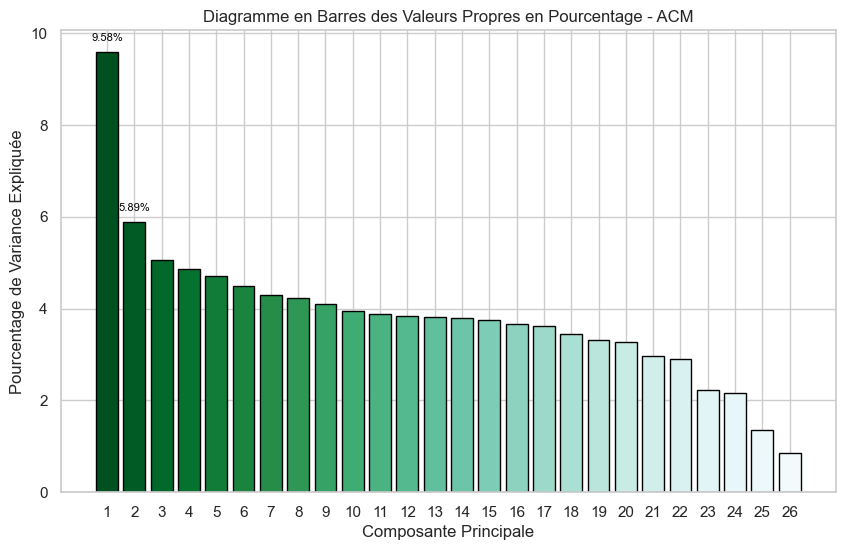

In [50]:
# Obtenir les valeurs propres associées à chaque composante principale
eigenvalues = acm.eig_

# Calculer le pourcentage de chaque valeur propre
total_variance = sum(eigenvalues[0])
percentage_var = [(value / total_variance) * 100 for value in eigenvalues[0]]

# Utiliser une palette de couleurs Seaborn et inverser l'ordre
sns.set(style="whitegrid")
palette = sns.color_palette("BuGn", len(percentage_var))
palette = palette[::-1]  # Inverser l'ordre des couleurs

# Tracer le diagramme en barres des valeurs propres en pourcentage
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(percentage_var) + 1), percentage_var, color=palette, edgecolor='black')
plt.xlabel('Composante Principale')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.title('Diagramme en Barres des Valeurs Propres en Pourcentage - ACM')

# Définir les ticks de l'axe x avec des valeurs entières
plt.xticks(range(1, len(percentage_var) + 1))

# Ajouter les étiquettes de valeur uniquement pour les deux premières barres
for i, (bar, value) in enumerate(zip(bars, percentage_var)):
    if i < 2:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{value:.2f}%',
                 ha='center', va='bottom', color='black', fontsize = 8)

plt.show()

In [51]:
info_col = acm.col_topandas()
info_col.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7', 'col_coord_dim8',
       'col_coord_dim9', 'col_coord_dim10', 'col_coord_dim11',
       'col_coord_dim12', 'col_coord_dim13', 'col_coord_dim14',
       'col_coord_dim15', 'col_coord_dim16', 'col_coord_dim17',
       'col_coord_dim18', 'col_coord_dim19', 'col_coord_dim20',
       'col_coord_dim21', 'col_coord_dim22', 'col_coord_dim23',
       'col_coord_dim24', 'col_coord_dim25', 'col_coord_dim26',
       'col_contrib_dim1', 'col_contrib_dim2', 'col_contrib_dim3',
       'col_contrib_dim4', 'col_contrib_dim5', 'col_contrib_dim6',
       'col_contrib_dim7', 'col_contrib_dim8', 'col_contrib_dim9',
       'col_contrib_dim10', 'col_contrib_dim11', 'col_contrib_dim12',
       'col_contrib_dim13', 'col_contrib_dim14', 'col_contrib_dim15',
       'col_contrib_dim16', 'col_contrib_dim17', 'col_contrib_dim18',
       'col_contrib_dim19', 'col_contrib_dim20',

In [53]:
coord_col = info_col[['col_coord_dim1', 'col_coord_dim2']]
print(coord_col)

                        col_coord_dim1  col_coord_dim2
col0_F                        0.775064       -0.066935
col0_M                       -0.579815        0.050073
col1_Afrique                  0.076461       -0.095710
col1_Amérique centrale        0.310623       -0.622489
col1_Amérique du Nord        -0.026556        0.126271
col1_Amérique du Sud         -0.008666        0.054251
col1_Asie                     0.402108       -0.120974
col1_Europe                  -0.133420        0.024361
col1_Océanie                 -0.211734        0.027390
col2_Athlétisme               0.140226       -0.257713
col2_Autres sports           -0.023925       -0.852073
col2_Combat                  -0.077660       -0.018623
col2_Gymnastique              1.549998        1.142001
col2_Natation                 0.006708        0.359253
col2_Raquette                 0.210559       -0.697415
col2_Sport collectif         -0.530826        0.401432
col2_Sur l'eau               -0.521042        0.044232
col3_Bronz

In [54]:
contrib_col = pd.DataFrame(info_col[['col_contrib_dim1', 'col_contrib_dim2']])
contrib_col

,col_contrib_dim1,col_contrib_dim2
col0_F,10.317411,0.125288
col0_M,7.718313,0.093726
col1_Afrique,0.016084,0.041032
col1_Amérique centrale,0.023776,0.155470
col1_Amérique du Nord,0.003575,0.131613
col1_Amérique du Sud,0.000192,0.012225
col1_Asie,1.211321,0.178511
col1_Europe,0.345628,0.018762
col1_Océanie,0.116890,0.003185
col2_Athlétisme,0.145920,0.802492


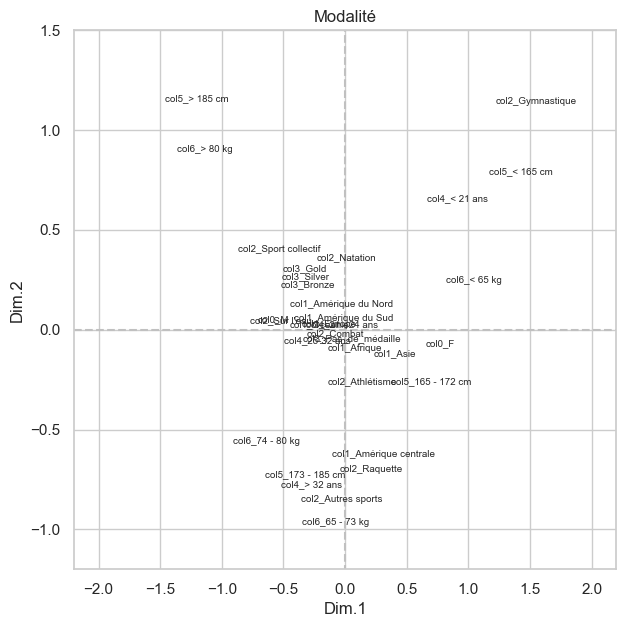

In [61]:
#ACM -projection des colonnes
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
ax.axis([-2.2, +2.2, -1.2, +1.5])
ax.plot([-2.2, +2.2], [0, 0], color="silver", linestyle="--")
ax.plot([0, 0], [-2.2, +2.2], color='silver', linestyle="--")
ax.set_xlabel('Dim.1')
ax.set_ylabel('Dim.2')
plt.title("Modalité")

for x, y, lbl in zip(coord_col.iloc[:, 0], coord_col.iloc[:, 1], coord_col.index):
    ax.text(x, y, lbl, horizontalalignment='center', verticalalignment='center', fontsize=7)

plt.show()


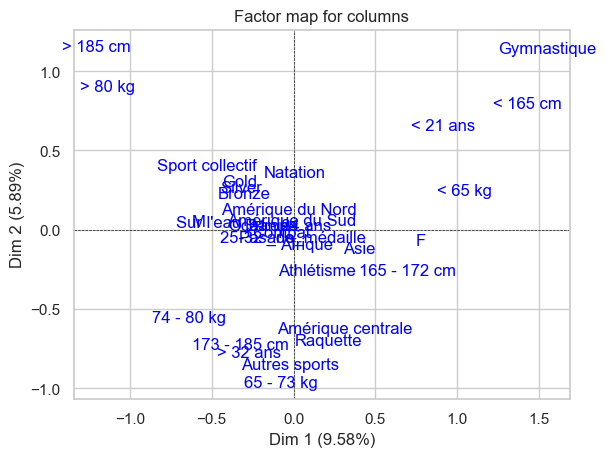

In [65]:
#ACM -projection en couleur
acm.mapping_col(num_x_axis = 1 , num_y_axis = 2)